<a href="https://colab.research.google.com/github/ashwaj15/STOCK-MARKET-PREDICTION/blob/main/STOCK_MARKET_PREDICTION_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Prediction Using Long Short-Term Memory (LSTM)**

---



* Stock market prediction and forecasting using Stacked LSTM (Long Short-Term Memory) is a popular technique in the field of time series forecasting.

* LSTM is a type of recurrent neural network (RNN) architecture that has been shown to perform well in modeling sequential data such as time series. Stacked LSTM refers to the use of multiple LSTM layers stacked on top of each other.

* The process of using stacked LSTM for stock market prediction involves training the model on historical stock market data, which includes factors such as prices, volumes, and other indicators. The model learns the patterns and trends in the data and uses this knowledge to make predictions about future prices.

* The input to the model is typically a sequence of historical data points, and the output is a predicted future value or sequence of values. The model is trained using backpropagation through time (BPTT) and the loss function is typically mean squared error (MSE) or mean absolute error (MAE).

* Overall, stacked LSTM has been shown to be an effective technique for stock market prediction and forecasting, and is commonly used in the finance industry for decision making. However, it is important to note that no model can provide perfect predictions and forecasting, and it is important to always consider multiple factors and sources of information when making financial decisions.









---


## **1. Importing libraries**

---



In [45]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!unzip /content/drive/MyDrive/dataset/archive\ \(3\).zip -d /content/dataset




---


## **2. Loading the Data**

---




In [46]:
import pandas as pd

df = pd.read_csv('/content/dataset/ASIANPAINT.csv')
df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


<Axes: >

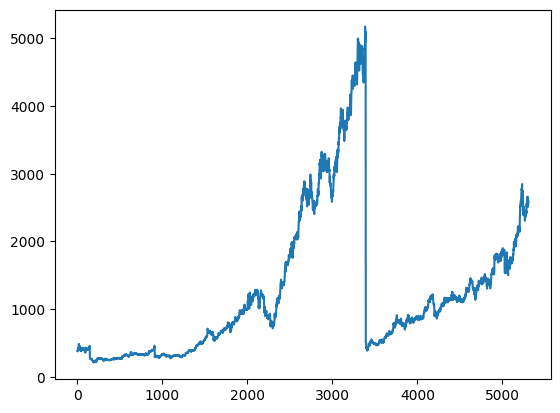

In [47]:
df['VWAP'].plot()



---


## **3. Set target variables & features**

---



In [48]:
output_var = pd.DataFrame(df['VWAP'])

features = ['Open', 'High', 'Low', 'Volume']



---


## **4. Scaling**

---



In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.031929,0.034628,0.033562,0.000285
1,0.033925,0.035026,0.034573,0.000415
2,0.032228,0.034628,0.033865,0.000225
3,0.034903,0.033615,0.034472,0.000288
4,0.033126,0.034628,0.033562,0.000828


In [50]:
feature_transform.shape

(5306, 4)



---


## **5. Train and Test Split**

---



In [51]:
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [52]:
print(X_train.shape)
print(X_test.shape)

(4824, 4)
(482, 4)




---


## **6. Data Processing For LSTM**

---



In [53]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)

(4824, 1, 4)
(482, 1, 4)




---


## **7. Building the LSTM Model for Stock Market Prediction**

---




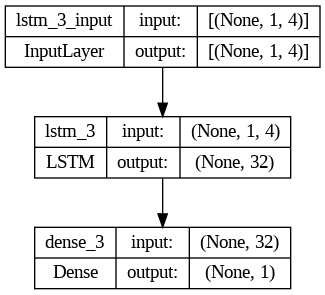

In [43]:
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)




---


## **8. Model Training**

---



In [54]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
603/603 [==============================] - 2s 2ms/step - loss: 2573163.5000
Epoch 2/100
603/603 [==============================] - 1s 2ms/step - loss: 2517911.7500
Epoch 3/100
603/603 [==============================] - 1s 2ms/step - loss: 2441541.0000
Epoch 4/100
603/603 [==============================] - 1s 2ms/step - loss: 2346246.2500
Epoch 5/100
603/603 [==============================] - 1s 2ms/step - loss: 2236086.2500
Epoch 6/100
603/603 [==============================] - 1s 2ms/step - loss: 2115184.7500
Epoch 7/100
603/603 [==============================] - 1s 1ms/step - loss: 1987085.3750
Epoch 8/100
603/603 [==============================] - 1s 1ms/step - loss: 1854816.1250
Epoch 9/100
603/603 [==============================] - 1s 1ms/step - loss: 1721035.6250
Epoch 10/100
603/603 [==============================] - 1s 1ms/step - loss: 1588097.0000
Epoch 11/100
603/603 [==============================] - 1s 1ms/step - loss: 1458094.7500
Epoch 12/100
603/603 [========



---


## **9. LSTM Prediction**

---



In [55]:
y_pred= lstm.predict(X_test)

16/16 [==============================] - 0s 2ms/step




---


## **10. Comparing Predicted vs True Adjusted Close Value – LSTM**

---



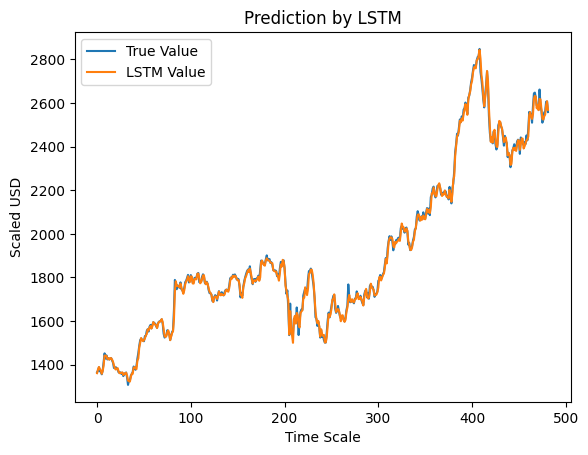

In [42]:
#Predicted vs True Adj Close Value – LSTM
import matplotlib.pyplot as plt
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()



* Blue indicates the True value.
* Orange indicates the LSTM value.







---


## **11.Conclusion**

---



>Finally, we have successfully built a Stock Market Prediction and Forecasting Using Stacked LSTM.

# ***THANK YOU...***